<a href="https://colab.research.google.com/github/ballmdr/Forex-Prediction-Machine_Learning/blob/master/MNIST_Convolutional_Keras_Tensorflow_Pytorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import keras
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# test keras
K = 10
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train.min()

0

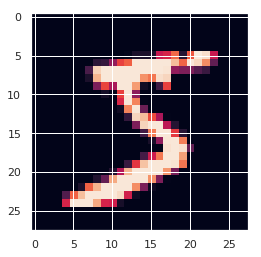

In [0]:
plt.imshow(x_train[0])

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), padding='same',
                        activation='relu', use_bias=True, bias_initializer='zeros',
                        kernel_initializer='he_normal', input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), padding='same',
                        activation='relu', use_bias=True, bias_initializer='zeros',
                        kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


W0621 06:41:01.199916 140053554890624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.1522 - acc: 0.9529 - val_loss: 0.0706 - val_acc: 0.9764
Epoch 2/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0539 - acc: 0.9827 - val_loss: 0.0498 - val_acc: 0.9845
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0374 - acc: 0.9876 - val_loss: 0.0483 - val_acc: 0.9841
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0299 - acc: 0.9902 - val_loss: 0.0497 - val_acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0238 - acc: 0.9924 - val_loss: 0.0558 - val_acc: 0.9845
Epoch 6/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0186 - acc: 0.9939 - val_loss: 0.0502 - val_acc: 0.9871
Epoch 7/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0173 - acc: 0.9942 - val_loss: 0.

In [0]:
tfX = tf.placeholder(dtype=tf.float32, shape=(None, 28, 28, 1))
tfY = tf.placeholder(dtype=tf.int32, shape=(None, 1))

kernel1 = tf.Variable(tf.random.truncated_normal(shape=(5, 5, 1, 16), stddev=5e-2, dtype=tf.float32))
conv1 = tf.nn.conv2d(tfX, filter=kernel1, strides=(2,2), padding='SAME')
b1 = tf.Variable(tf.zeros(kernel1.shape[-1]))
z1 = tf.nn.relu(conv1 + b1)
pool1 = tf.nn.max_pool2d(z1, ksize=(2,2), strides=(1,1), padding='SAME')
norm1 = tf.nn.lrn(pool1)

kernel2 = tf.Variable(tf.random.truncated_normal(shape=(5,5,1,16), stddev=0.01, dtype=tf.float32))
conv2 = tf.nn.conv2d(norm1, filter=kernel2, strides=(2,2), padding='SAME')
b2 = tf.Variable(tf.zeros(kernel2.shape[-1]))
z2 = tf.nn.relu(conv2 + b2)
norm2 = tf.nn.lrn(z2)
pool2 = tf.nn.max_pool2d(norm2, ksize=(2,2), strides=(1,1), padding='SAME')

flat = tf.layers.Flatten()(pool2)

hidden = 5
hidden2 = 5
hidden3 = 5

w3 = tf.Variable(tf.random_normal(shape=(flat.get_shape()[1].value, hidden)))
b3 = tf.Variable(tf.zeros(hidden))
z3 = tf.nn.relu(tf.matmul(flat, w3) + b3)

w4 = tf.Variable(tf.random_normal(shape=(hidden, hidden2)))
b4 = tf.Variable(tf.zeros(hidden2))
z4 = tf.nn.relu(tf.matmul(z3, w4) + b4)

w5 = tf.Variable(tf.random_normal(shape=(hidden2, hidden3)))
b5 = tf.Variable(tf.zeros(hidden3))
z5 = tf.nn.relu(tf.matmul(z4, w5) + b5)

w_output = tf.Variable(tf.random_normal(shape=(hidden3, K)))
b_output = tf.Variable(tf.zeros(K))
logits = tf.matmul(z5, w_output) + b_output


loss = tf.reduce_mean(tf.losses.sparse_softmax_cross_entropy(tfY, logits))

train_op = tf.train.AdamOptimizer(0.01).minimize(loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for i in range(1000):
    _, cost = sess.run([train_op, loss], feed_dict={
        tfX: x_train, tfY: y_train
    })
    
    cost_test = sess.run(loss, feed_dict={
        tfX: x_test, tfY: y_test
    })
    
    if i % 10 == 0:
      print(i, ' train: ', cost, ' test: ', cost_test)


0  train:  2.6412594  test:  3.1893191
10  train:  2.3026965  test:  2.3024998
20  train:  2.3026323  test:  2.302402
30  train:  2.3021486  test:  2.3019009
40  train:  2.3016984  test:  2.301475
50  train:  2.301461  test:  2.3012624
60  train:  2.301339  test:  2.3011563
70  train:  2.3012583  test:  2.301088
80  train:  2.3012064  test:  2.3010476
90  train:  2.3011792  test:  2.301029
100  train:  2.301167  test:  2.3010218
110  train:  2.301162  test:  2.3010201
120  train:  2.3011599  test:  2.3010194
130  train:  2.3011594  test:  2.3010194
140  train:  2.3011591  test:  2.3010194
150  train:  2.301159  test:  2.3010192
160  train:  2.3011594  test:  2.3010194
170  train:  2.3011594  test:  2.3010192
180  train:  2.3011591  test:  2.3010192
190  train:  2.3011591  test:  2.3010192
200  train:  2.3011594  test:  2.3010192
210  train:  2.3011594  test:  2.3010192
220  train:  2.301159  test:  2.3010192


In [0]:
test_z[0]

array([-3.1160180e+07, -1.3726894e+08,  2.4888931e+08,  1.0481985e+08,
        3.5196403e+08,  3.2104360e+07, -9.9220560e+07, -2.6759344e+08,
       -1.4448282e+08, -2.0391834e+08], dtype=float32)

In [0]:
}test_z[0].shape

(14, 14, 32)